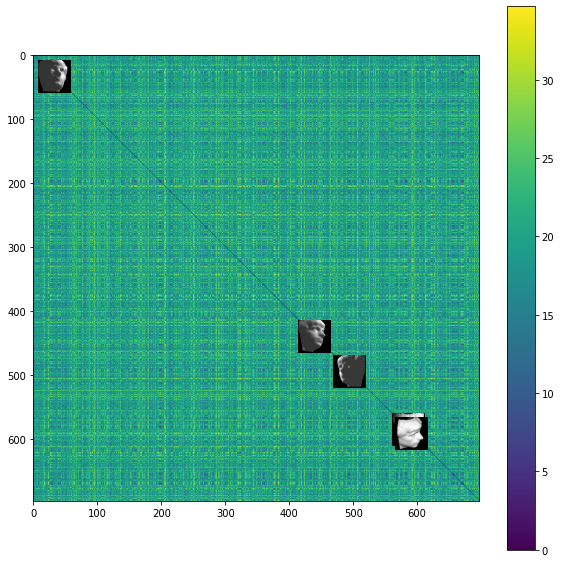

In [1]:
# part A - takes awhile to run b/c of the distance calc and large amount of data
import scipy.io as spio
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import random as rand 

# Import data, transpose so each row is an image
images = spio.loadmat('isomap.mat',squeeze_me=True)['images'].T
m,n = images.shape

# Build weighted graph A 
distance = np.linalg.norm(images[:, np.newaxis] - images, axis=2)
A = distance

# Select 5 images (nodes) at different parts of the graph
rand.seed(10)
nodes = rand.sample(range(m), 5)

fig, ax = plt.subplots(figsize=(10, 10))

#source: https://stackoverflow.com/questions/4860417/placing-custom-images-in-a-plot-window-as-custom-data-markers-or-to-annotate-t/4872190
for node_index in nodes:
    img = images[node_index,:].reshape(64, 64).T
    off_img= OffsetImage(img, cmap = 'gray',zoom=0.5,)
    ab = AnnotationBbox(off_img, (node_index, node_index) ,pad=0)
    ax.add_artist(ab)
    ax.scatter(node_index,node_index)
plt.imshow(A)
plt.colorbar()
plt.show()

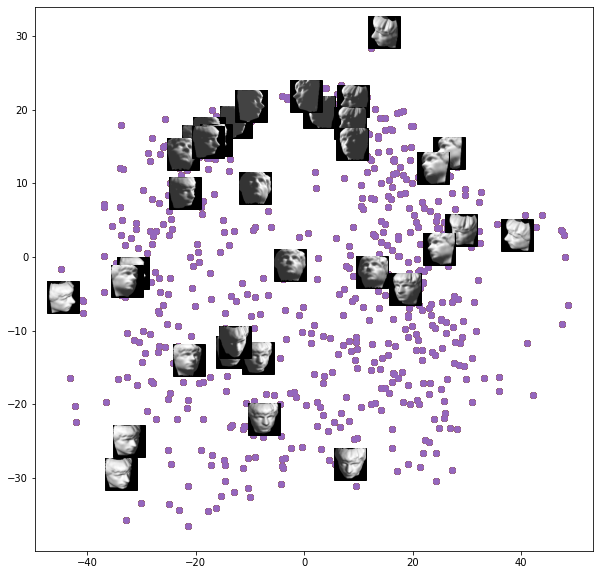

In [2]:
#B
import numpy as np
import scipy.io as sio
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import shortest_path
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import scipy.sparse.linalg as ll

#create epsilon- ISOMAP
epsilon = 12 #choose an epilson, this can be changed to a larger or smaller radius
A= np.where(distance <= epsilon, distance, 0)

# from ed discussion #145. sklearn version was not working for me
D= shortest_path(A)

#centering matrix
ones = np.ones(shape = (m))
H = np.identity(m) - (1/m)*np.outer(ones, ones.T)
C = (-0.5)*H.dot(D**2).dot(H)

#from PCA file to calculat s
K = 2
S,W = ll.eigs(C,k = K)
S = S.real
W = W.real

#Compute eigenvalues
#source: #source: https://stats.stackexchange.com/questions/217755/python-pca-regenerating-loadings-using-eigen-vectors-and-eigen-values
_, v = np.linalg.eig(C)
dim_1 = v[:,0]*np.sqrt(S[0])
dim_2 = v[:,1]*np.sqrt(S[1])


fig, ax = plt.subplots(figsize=(10, 10))

#select random nodes 
rand.seed(10)
nodes = rand.sample(range(m), 35)

for node_index in nodes:
    img = images[node_index,:].reshape(64, 64).T
    off_img= OffsetImage(img, cmap = 'gray',zoom=0.5,)
    ab = AnnotationBbox(off_img, (dim_1[node_index], dim_2[node_index]) ,pad=0)
    ax.add_artist(ab)
    ax.scatter(dim_1,dim_2)


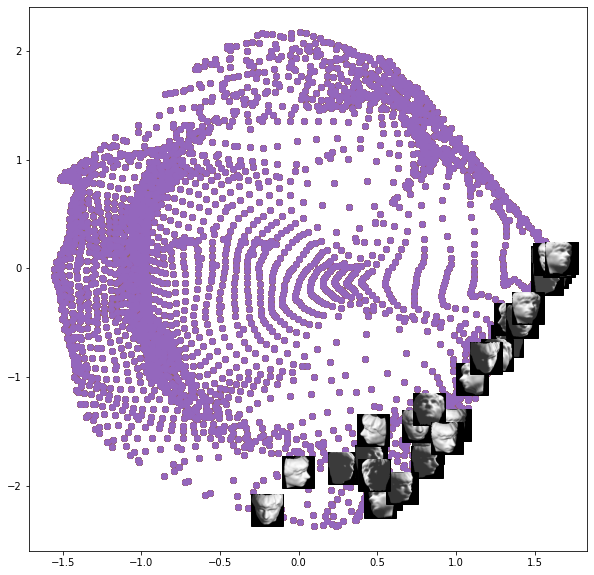

In [3]:
#part C
import math
Anew = images
# Calculate the mean and center the data
mu = np.mean(Anew, axis=1)
xc = Anew - mu[:, None]

C = np.dot(xc, xc.T) / n

# Perform eigenvalue decomposition
K = 2
S, W = ll.eigs(C,k = K)
S = S.real
W = W.real


# Extract the first two principal components for each food item
dim1 = np.dot(W[:,0].T,xc)/math.sqrt(S[0]) # extract 1st eigenvalues
dim2 = np.dot(W[:,1].T,xc)/math.sqrt(S[1]) # extract 2nd eigenvalue

fig, ax = plt.subplots(figsize=(10, 10))

#select random nodes 
rand.seed(10)
nodes = rand.sample(range(m), 35)


for node_index in nodes:
    img = images[node_index,:].reshape(64, 64).T
    off_img= OffsetImage(img, cmap = 'gray',zoom=0.5,)
    ab = AnnotationBbox(off_img, (dim1[node_index], dim2[node_index]) ,pad=0)
    ax.add_artist(ab)
    ax.scatter(dim1,dim2)

plt.show()